# Part 1
- just need to download as csv
- check that interpolation is correct type



In [ ]:
pip install fix-yahoo-finance==0.1.30

  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.30-py3-none-any.whl size=12154 sha256=4ac77ad46e3d7277f6d1ee21457be9169f04c9d70511a74d312441efb92545de
  Stored in directory: /root/.cache/pip/wheels/56/aa/91/bf3efdfaa5f1d39aa13325848db30ed4cb17113a1f500bbbe9
Successfully built fix-yahoo-finance
  Attempting uninstall: fix-yahoo-finance
    Found existing installation: fix-yahoo-finance 0.0.22
    Uninstalling fix-yahoo-finance-0.0.22:
      Successfully uninstalled fix-yahoo-finance-0.0.22


In [ ]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 8.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=290c9d12aee83bcc56c55db3a21e0a09173a9dcd87f33a22ba351e09a0c15e38
  Stored in directory: /root/.cache/pip/wheels/4b

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
dataset = yf.download('^GSPC', 
                      start='2016-11-16', 
                      end='2021-11-16', 
                      progress=False,
)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,2177.530029,2179.219971,2172.199951,2176.939941,2176.939941,3830590000
2016-11-17,2178.610107,2188.060059,2176.649902,2187.120117,2187.120117,3809160000
2016-11-18,2186.850098,2189.889893,2180.379883,2181.899902,2181.899902,3572400000
2016-11-21,2186.429932,2198.699951,2186.429932,2198.179932,2198.179932,3607010000
2016-11-22,2201.560059,2204.800049,2194.510010,2202.939941,2202.939941,3957940000


In [ ]:
len(dataset)/5

251.6

In [ ]:
# Checking whether there are any null values in the data (there isn't)
dataset.isnull().values.any()

False

In [ ]:
# Save dataset as a csv
type(dataset)
dataset.to_csv('S&P500historicaldata.csv')

In [ ]:
# Linear interpolation
dataset_linear = dataset.interpolate()
dataset_linear

In [ ]:
# Polynomial interpolation
dataset_poly = dataset.interpolate(method='polynomial', order=2)
dataset_poly


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,2177.530029,2179.219971,2172.199951,2176.939941,2176.939941,3830590000
2016-11-17,2178.610107,2188.060059,2176.649902,2187.120117,2187.120117,3809160000
2016-11-18,2186.850098,2189.889893,2180.379883,2181.899902,2181.899902,3572400000
2016-11-21,2186.429932,2198.699951,2186.429932,2198.179932,2198.179932,3607010000
2016-11-22,2201.560059,2204.800049,2194.510010,2202.939941,2202.939941,3957940000
...,...,...,...,...,...,...
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,4685.250000,3110230000
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,4646.709961,3581630000
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,4649.270020,2623140000


In [ ]:
# Interpolation through padding
dataset_pad = dataset.interpolate(method='pad', limit=2)
dataset_pad

In [ ]:
new = dataset[['Adj Close']].copy()
new

,Adj Close
Date,
2016-11-16,2176.939941
2016-11-17,2187.120117
2016-11-18,2181.899902
2016-11-21,2198.179932
2016-11-22,2202.939941
...,...
2021-11-09,4685.250000
2021-11-10,4646.709961
2021-11-11,4649.270020


Why are adjusted prices preferred?
- Adjustments allow investors to obtain an accurate record of the stock's performance. Investors should understand how corporate actions are accounted for in a stock's adjusted closing price.
https://www.investopedia.com/terms/a/adjusted_closing_price.asp


In [ ]:
# Convert dataframe to numpy
new.to_numpy()


array([[2176.93994141],
       [2187.12011719],
       [2181.89990234],
       ...,
       [4649.27001953],
       [4682.85009766],
       [4682.79980469]])

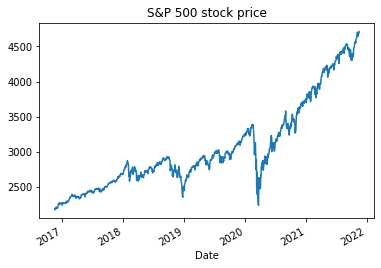

In [ ]:
ticker = yf.Ticker('^GSPC')
dataset = ticker.history(period="5y")
dataset['Close'].plot(title="S&P 500 stock price")

# Part 2

Need to do diagram for this still (bonus bit)

In [ ]:
import numpy as np
def binomial_tree(S0, X, T, r, u, d, n):
  dt = T/n
  q = (np.exp(r*dt)-d)/(u-d)
  starter = np.exp(-r*dt)

  # store prices of each node at time maturity
  S = np.zeros(n+1)
  for j in range(0,n+1):
    S[j]=S0 * u**j * d**(n-j)
  
  # create array to store price of derivatives
  P = []

  # calculate the option payoff for last nodes
  C = np.zeros(n+1)
  for j in range(0,n+1):
    C[j]=max(0,X-S[j])
    P.append(C[j])

  for i in np.arange(n-1,-1,-1): # for every column from the second last to the start
    for j in range(0,i+1): # for every row, i+1 as always an extra term for number of cols
      S = S0 * u**j * d**(i-j)
      C[j]=np.exp(-r*(T/n))*(q*C[j+1]+(1-q)*C[j])
      C[j]=max(C[j],X-S)
      P.append(C[j])

  
  # Uncomment below for more clear output
  for i in range(len(P)):
    print("Derivative price of node ", i," = ", P[i])

  return P

S0=10
X=12
u=6/5
d=4/5
r=0.05
n=3
T=1.5
binomial_tree(S0,X,T,r,u,d,n)


Derivative price of node  0  =  6.879999999999999
Derivative price of node  1  =  4.3199999999999985
Derivative price of node  2  =  0.4800000000000004
Derivative price of node  3  =  0.0
Derivative price of node  4  =  5.599999999999999
Derivative price of node  5  =  2.3999999999999986
Derivative price of node  6  =  0.2044462733207992
Derivative price of node  7  =  4.0
Derivative price of node  8  =  1.1345500962119341
Derivative price of node  9  =  2.3270182758134315


[6.879999999999999,
 4.3199999999999985,
 0.4800000000000004,
 0.0,
 5.599999999999999,
 2.3999999999999986,
 0.2044462733207992,
 4.0,
 1.1345500962119341,
 2.3270182758134315]

# Part 3

Task 1 - Standard Brownian Motion

https://towardsdatascience.com/brownian-motion-with-python-9083ebc46ff0
https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method

https://www.youtube.com/watch?v=hqSnruUe3tA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def standard_brownian_motion(n_steps):
    T = 1.
    times=np.linspace(0.,T,n_steps)
    dt=times[1]-times[0]

    # Independent normally distributed increments: Bt-Bs ~ Normal(mean=0,var=t-s)
    dB=np.sqrt(dt)*np.random.normal(size=(n_steps-1,)) # differences
    B0=np.zeros(shape=(1,))
    B=np.concatenate((B0,np.cumsum(dB))) # add initial value to cumulative sum of increments
    plt.plot(times,B)

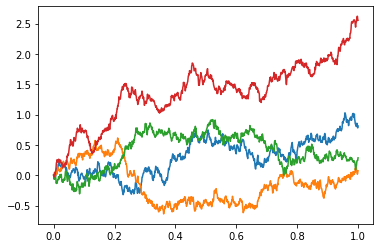

In [ ]:
for i in range(4):
    standard_brownian_motion(1000)
plt.show()

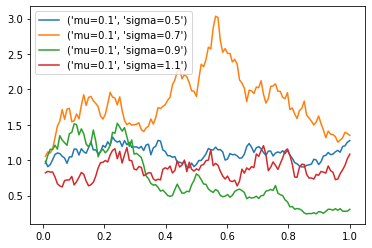

In [ ]:
def geometric_brownian_motion(mu,sigma,S0,n_steps):
  dt = 1.0 / n_steps
  t = np.arange(dt, 1 + dt, dt)

  dB = np.sqrt(dt) * np.random.randn(n_steps)
  B  = np.cumsum(dB)

  S_simulation, S=[],S0
  for j in range(n_steps):
    S+= mu*S*dt+sigma*S*dB[j]
    S_simulation.append(S)

  label1="mu="+str(mu),"sigma="+str(sigma)
  plt.plot(t,S_simulation,label=label1)
  plt.legend()

geometric_brownian_motion(0.1,0.5,1,2**7)
geometric_brownian_motion(0.1,0.7,1,2**7)
geometric_brownian_motion(0.1,0.9,1,2**7)
geometric_brownian_motion(0.1,1.1,1,2**7)

plt.show()

https://www.investopedia.com/articles/investing/112514/monte-carlo-simulation-basics.asp

In [ ]:
def monte_carlo(option_type,S0,K,T,r,sigma,n_steps):
  C = []
  C_total = 0
  for i in range(n_steps):
    St=S0
    St = St * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*np.random.normal(0, 1))
    if option_type == 'c':
        payoff = max(0,St-K)
    elif option_type == 'p':
        payoff = max(0,K-St)
    C.append(payoff*np.exp(-r*T))
    C_total+=C[i]
  C_hat=C_total/n_steps
  return C, C_hat

def confidence_interval(C, C_hat, n_steps, z):
  s=0
  for i in range(len(C)):
    s += (C[i]-C_hat)**2
  sd = np.sqrt((1/(n_steps-1))*s)
  upper = C_hat + z*(sd/np.sqrt(n_steps))
  lower = C_hat - z*(sd/np.sqrt(n_steps))
  return(lower,upper)

In [ ]:
call= monte_carlo('c',100,80,1,0.05,0.3,5000)
put= monte_carlo('p',100,80,1,0.05,0.3,5000)

print("Call: ",call[1])
print("Put: ",put[1])

CI_call = confidence_interval(call[0],call[1],5000,0.95)
CI_put = confidence_interval(put[0],put[1],5000,0.95)

print("95% CI of Call -  Lower: ",CI_call[0], "Upper: ", CI_call[1])
print("95% CI of Put -  Lower: ",CI_put[0], "Upper: ", CI_put[1])

Call:  26.277410240684294
Put:  2.511881267612533
95% CI of Call -  Lower:  25.908269459752596 Upper:  26.64655102161599
95% CI of Put -  Lower:  2.428534654549346 Upper:  2.59522788067572


In [ ]:
interest = np.linspace(0,1,5)
for i in range(len(interest)-1):
  call= monte_carlo('c',100,80,1,i,0.3,5000)
  put= monte_carlo('p',100,80,1,i,0.3,5000)
  CI_call = confidence_interval(call[0],call[1],5000,0.95)
  CI_put = confidence_interval(put[0],put[1],5000,0.95)
  print("R: ",float("{0:.3f}".format(risk_range[i])),"Call: ",float("{0:.3f}".format(call[1])),"Put: ",float("{0:.3f}".format(put[1])), "95% CI of Call -  Lower: ",float("{0:.3f}".format(CI_call[0])), "Upper: ", CI_call[1], "95% CI of Put -  Lower: ",CI_put[0], "Upper: ", CI_put[1])

R:  0.0 Call:  23.675 Put:  3.569 95% CI of Call -  Lower:  23.321 Upper:  24.02906864764958 95% CI of Put -  Lower:  3.4680926981523426 Upper:  3.6690550936505435
R:  0.013 Call:  69.599 Put:  0.0 95% CI of Call -  Lower:  69.194 Upper:  70.0045215674344 95% CI of Put -  Lower:  0.0 Upper:  0.0
R:  0.026 Call:  89.014 Put:  0.0 95% CI of Call -  Lower:  88.604 Upper:  89.4254464618045 95% CI of Put -  Lower:  0.0 Upper:  0.0
R:  0.039 Call:  95.796 Put:  0.0 95% CI of Call -  Lower:  95.381 Upper:  96.21033869782006 95% CI of Put -  Lower:  0.0 Upper:  0.0


# Part 4
https://www.math.tamu.edu/~stecher/425/Sp12/blackScholesHeatEquation.pdf


# Part 5 draft IGNORE

https://www.youtube.com/watch?v=YxlxU4wzyWw
https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5

https://www.youtube.com/watch?v=f2BCmQBCwDs


In [ ]:
# Calculate return matrix
import numpy as np
returns = np.log(dataset).diff() # log[i+1]-log[i] = log[i+1/i]

In [ ]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,2177.530029,2179.219971,2172.199951,2176.939941,2176.939941,3830590000
2016-11-17,2178.610107,2188.060059,2176.649902,2187.120117,2187.120117,3809160000
2016-11-18,2186.850098,2189.889893,2180.379883,2181.899902,2181.899902,3572400000
2016-11-21,2186.429932,2198.699951,2186.429932,2198.179932,2198.179932,3607010000
2016-11-22,2201.560059,2204.800049,2194.510010,2202.939941,2202.939941,3957940000


In [ ]:
returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-17,0.000496,0.004048,0.002046,0.004665,0.004665,-0.005610
2016-11-18,0.003775,0.000836,0.001712,-0.002390,-0.002390,-0.064171
2016-11-21,-0.000192,0.004015,0.002771,0.007434,0.007434,0.009642
2016-11-22,0.006896,0.002771,0.003689,0.002163,0.002163,0.092845


In [ ]:
# Interpolate as first row cannot be calculated from this method
returns_interpolated= returns.interpolate(method ='linear', limit_direction ='backward')
returns_interpolated.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,0.000496,0.004048,0.002046,0.004665,0.004665,-0.005610
2016-11-17,0.000496,0.004048,0.002046,0.004665,0.004665,-0.005610
2016-11-18,0.003775,0.000836,0.001712,-0.002390,-0.002390,-0.064171
2016-11-21,-0.000192,0.004015,0.002771,0.007434,0.007434,0.009642
2016-11-22,0.006896,0.002771,0.003689,0.002163,0.002163,0.092845


In [ ]:
# another method to calculate the returns.
daily_returns = dataset.pct_change()
net= daily_returns.interpolate(method ='linear', limit_direction ='backward')
net.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,0.000496,0.004057,0.002049,0.004676,0.004676,-0.005594
2016-11-17,0.000496,0.004057,0.002049,0.004676,0.004676,-0.005594
2016-11-18,0.003782,0.000836,0.001714,-0.002387,-0.002387,-0.062155
2016-11-21,-0.000192,0.004023,0.002775,0.007461,0.007461,0.009688
2016-11-22,0.006920,0.002774,0.003696,0.002165,0.002165,0.097291


In [ ]:
# Normalise returns matrix
normed = (returns_interpolated - returns_interpolated.mean(axis=0)) / returns_interpolated.std(axis=0)

In [ ]:
normed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-16,-0.011824,0.386182,0.138454,0.335243,0.335243,-0.030329
2016-11-17,-0.011824,0.386182,0.138454,0.335243,0.335243,-0.030329
2016-11-18,0.327476,0.024982,0.106218,-0.248337,-0.248337,-0.365223
2016-11-21,-0.083016,0.382433,0.208304,0.564223,0.564223,0.056891
2016-11-22,0.650416,0.242511,0.296800,0.128253,0.128253,0.532707


In [ ]:
# Store volatility matrix in np array
std=normed.std()
vol= np.diag(std.to_numpy())
vol

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
# Store mean_hat matrix in np array

mean_hat=normed.mean().to_numpy()
mean_hat

array([ 6.70722972e-18, -4.21408183e-18, -1.67680743e-18, -2.02375213e-17,
       -2.02375213e-17,  5.55994043e-18])

In [ ]:
# Set R, M and N
R = normed.to_numpy() # return matrix
N = len(R) # number of assets
M = normed.shape[1] # available return samples per asset

In [ ]:
N

In [ ]:
# Calculate estimated correlation
Phat = (1/M)*np.dot(R.transpose(),R)

In [ ]:
# Calculate sd of returns (volatility), multiply by 252 as 252 trading days in one year
#std = np.std(normed)* 252 ** 0.5
#std

In [ ]:
# Calculate diagonal volality matrix
#vol= np.diag(std.to_numpy())
#vol

In [ ]:
# Calculate covariance
Chat = np.dot(vol.transpose(),np.dot(Phat,vol))
Chat

array([[209.5       , 156.8006875 , 143.40043947,  55.48068739,
         55.48068739,   9.73888149],
       [156.8006875 , 209.5       , 172.11657351, 147.63681288,
        147.63681288,  12.14288878],
       [143.40043947, 172.11657351, 209.5       , 157.08136204,
        157.08136204, -27.47634311],
       [ 55.48068739, 147.63681288, 157.08136204, 209.5       ,
        209.5       , -20.24399102],
       [ 55.48068739, 147.63681288, 157.08136204, 209.5       ,
        209.5       , -20.24399102],
       [  9.73888149,  12.14288878, -27.47634311, -20.24399102,
        -20.24399102, 209.5       ]])

In [ ]:
# Calculate estimated annual mean of returns
#mean_hat = normed.mean() #* 252
#mean_hat

In [ ]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(normalised_returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (normalised_returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(normalised_returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print(all_weights[5227,:])
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]

[0.01226025 0.00471861 0.98302114]


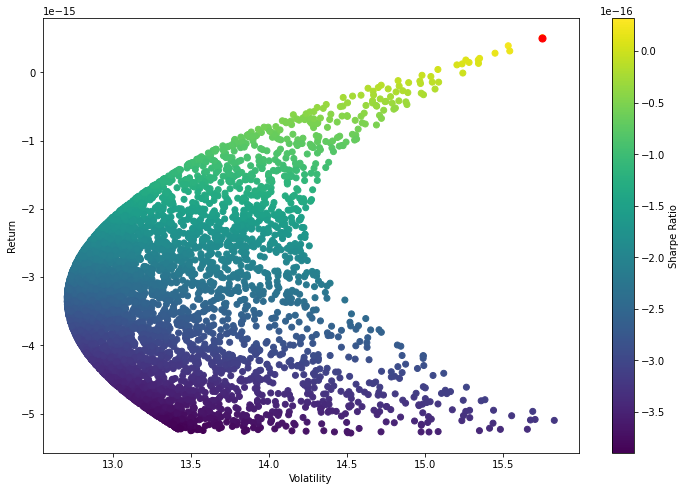

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
#plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot

plt.show()

In [ ]:
def negative_sharpe_ratio(w):
    w = np.array(w)
    R = np.sum(normalised_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(w.T, np.dot(Chat*252, w)))
    SR= R/vol
    return -SR
def check_sum(w):
    #return 0 if sum of the weights is 1
    return np.sum(w)-1
  
w0=[0.25,0.25,0.25]
bounds=((0,1),(0,1),(0,1))
constraints=({'type':'eq','fun':check_sum})

w_opt=minimize(negative_sharpe_ratio,w0,method='SLSQP',bounds=bounds,constraints=constraints)
w_opt

     fun: 1.1817219953842898e-17
     jac: array([-2.20946032e-17, -1.94880140e-17, -2.14425553e-17])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
returns=np.linspace(-6,1,400)
vol_opt=[]
w0=[0.25,0.25,0.25]
bounds=((0,1),(0,1),(0,1))
def minimizeVol(w):
  w = np.array(w)
  vol = np.sqrt(np.dot(w.T, np.dot(normalised_returns.cov()*252, w)))
  return vol

def getReturn(w):
    w = np.array(w)
    R = np.sum(normalised_returns.mean() * weights)*252
    return R
for r in returns:
  # find best vol
  constraints=({'type':'eq','fun':check_sum},
               {'type':'eq','fun':lambda w:getReturn(w)-r})
  opt=minimize(minimizeVol,w0,method='SLSQP',bounds=bounds,constraints=constraints)
  # save opt
  vol_opt.append(opt['fun'])

In [ ]:
vol_opt

[9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,
 9.570811976069075,


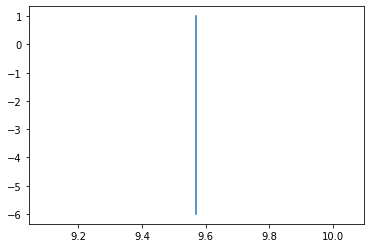

In [ ]:
plt.plot(vol_opt,returns)

In [ ]:
frontier_x = []
from scipy.optimize import minimize

frontier_y=np.linspace(-5,1,500)
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

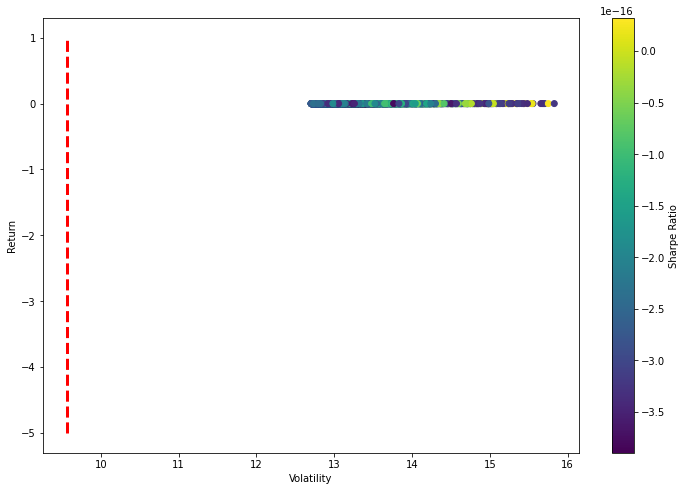

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [ ]:
n_array = np.array([mean, [30, 44]])
  
# Displaying the Matrix
print("Numpy Matrix is:")
print(n_array)
  
# calculating the determinant of matrix
det = np.linalg.det(n_array)
  
print("\nDeterminant of given 2X2 matrix:")
print(int(det))

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(normed.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)

    # Calculate returns
    returns = np.dot(weights, mean_hat*252) # Returns are the product of individual expected returns of asset and its 
                                      #weights 
    p_ret.append(returns)

    # Calculate variance
    var = np.sqrt(np.dot(weights.T, np.dot(Chat*252, weights)))# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(normed.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
  
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,Open weight,High weight,Low weight,Close weight,Adj Close weight,Volume weight
0,-1.946137e-15,204.172194,0.077011,0.090800,0.214172,0.285954,0.137874,0.194191
1,-2.476525e-15,209.615733,0.096681,0.215577,0.038908,0.330847,0.177332,0.140655
2,-1.301048e-15,211.733714,0.146001,0.259627,0.220810,0.043433,0.218407,0.111723
3,-2.497763e-16,197.575511,0.139761,0.268121,0.162640,0.025641,0.087310,0.316527
4,-2.138545e-15,216.190243,0.173264,0.252371,0.089318,0.201658,0.229856,0.053532


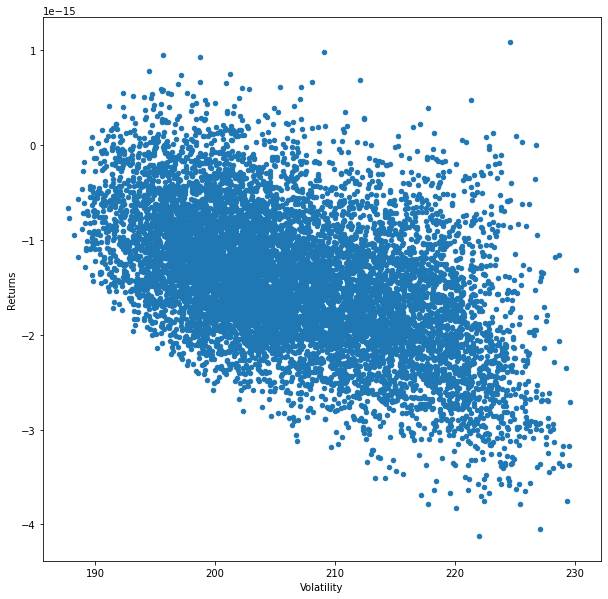

In [ ]:
portfolios.plot.scatter(x='Volatility', y='Returns',figsize=[10,10])


In [ ]:
sorted = portfolios.sort_values('Volatility')
sorted.head()

,Returns,Volatility,Open weight,High weight,Low weight,Close weight,Adj Close weight,Volume weight
4333,-6.699921e-16,187.771033,0.220491,0.008523,0.048210,0.110474,0.201162,0.411141
8455,-7.734318e-16,187.803257,0.213376,0.009293,0.042389,0.086888,0.241684,0.406370
6845,-9.503090e-16,188.264054,0.213617,0.025635,0.024098,0.321782,0.032948,0.381920
5911,-5.720206e-16,188.554151,0.177891,0.022101,0.121729,0.092611,0.176292,0.409376
1213,-1.178561e-15,188.607562,0.165566,0.002500,0.039164,0.119384,0.272858,0.400528


In [ ]:
for every_row in sorted:
  

In [ ]:
# Set an example portfolio with weights q, must equal 1 and be in range [0,1]
q = [0.1,0.2,0.3,0.1,0.1,0.2]
q

[0.1, 0.2, 0.3, 0.1, 0.1, 0.2]

In [ ]:
# Calculate return and std_dev for this portfolio
portfolio_return = np.sum(mean_hat * q)# * 252 ,sum of the weights*expected returns
portfolio_std_dev = np.sqrt(np.dot(q,np.dot(Chat, q)))# * np.sqrt(252)

print(f'Portfolio expected annualised return is {portfolio_return} and volatility is {portfolio_std_dev}')

Portfolio expected annualised return is -3.610651788153953e-18 and volatility is 10.533009283524533


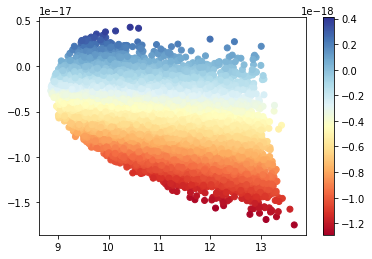

In [ ]:
import matplotlib.pyplot as plt

num_portfolios = 25000
#set up array to hold results
results = np.zeros((3,num_portfolios))
X = []
y = []
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(1)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_hat * weights) #* 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(Chat, weights))) #* np.sqrt(252)

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev

    X.append(portfolio_std_dev)
    y.append(portfolio_return)
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

In [ ]:
# calculating optimal allocation vector
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mean_hat, Chat)
ef.portfolio_performance(verbose=True)


ValueError: ignored

In [ ]:
pip install PyPortfolioOpt


     |████████████████████████████████| 61 kB 3.8 MB/s 
     |████████████████████████████████| 2.8 MB 8.8 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


# **Part** 5 - draft 2 IGNORE

In [ ]:
# Upload all data. I will be making a portfolio of S&P500, Tesla and Amazon
sp500 = yf.download('^GSPC', 
                      start='2016-11-16', 
                      end='2021-11-16', 
                      progress=False,
)
sp500 = sp500[['Adj Close']].copy()
sp500.rename(columns = {'Adj Close':'SP500'}, inplace = True)
final_data = sp500

tesla = yf.download('TSLA', 
                      start='2016-11-16', 
                      end='2021-11-16', 
                      progress=False,
)
final_data.insert(1, 'Tesla', tesla.loc[:,'Adj Close'], allow_duplicates = False)
amazon = yf.download('AMZN', 
                      start='2016-11-16', 
                      end='2021-11-16', 
                      progress=False,
)
google = yf.download('GOOGL', 
                      start='2016-11-16', 
                      end='2021-11-16', 
                      progress=False,
)
final_data.insert(2, 'Amazon', amazon.loc[:,'Adj Close'], allow_duplicates = False)
final_data.insert(3, 'Google', google.loc[:,'Adj Close'], allow_duplicates = False)

final_data.head()

,SP500,Tesla,Amazon,Google
Date,,,,
2016-11-16,2176.939941,36.785999,746.489990,779.979980
2016-11-17,2187.120117,37.731998,756.400024,786.159973
2016-11-18,2181.899902,37.004002,760.159973,775.969971
2016-11-21,2198.179932,36.903999,780.000000,784.799988
2016-11-22,2202.939941,38.234001,785.330017,785.000000


In [ ]:
returns_1 = final_data.pct_change()
returns_1.head()

,SP500,Tesla,Amazon,Google
Date,,,,
2016-11-16,NaN,NaN,NaN,NaN
2016-11-17,0.004676,0.025716,0.013276,0.007923
2016-11-18,-0.002387,-0.019294,0.004971,-0.012962
2016-11-21,0.007461,-0.002702,0.026100,0.011379
2016-11-22,0.002165,0.036040,0.006833,0.000255


In [ ]:
import numpy as np
returns = np.log(dataset).diff() # log[i+1]-log[i] = log[i+1/i]

In [ ]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-17,-0.005211,0.030574,0.020286,-0.000364,0.002597,0.020989,0.018211,0.010954,0.008910,0.016485,0.004850,-0.006028,0.011831,0.011408,0.000825,-0.002206,0.007024,0.007766,0.002026,-0.000347,0.015026,0.010566,0.017263,0.033462,0.013792,0.014878,0.010453,0.023375,0.0,0.098033,0.015472,0.000883,-0.003603,0.001043,0.013188,-0.000341,0.006974,-0.003692,0.013189,0.003190,...,0.016779,0.012287,0.012570,0.011553,0.016212,-0.003152,0.002727,0.008469,0.015935,0.008037,-0.016813,-0.009012,-0.001880,-0.007167,-0.013236,0.009570,-0.012339,0.007048,-0.016482,0.015552,0.007068,0.015611,0.000873,-0.003638,-0.031301,0.015751,0.002816,0.008264,-0.002990,0.043733,-0.000256,-0.005806,-0.006083,0.006254,-0.006276,0.005942,-0.000793,0.013480,0.011941,0.007547
2016-11-18,-0.019785,0.009338,-0.022805,0.001000,-0.019310,-0.011922,-0.001674,-0.013711,0.000507,-0.007494,0.003805,0.011331,0.000106,-0.020083,-0.000619,-0.007161,-0.002628,0.001518,-0.004994,-0.006159,-0.002133,-0.002405,-0.006166,-0.024991,0.007832,0.003338,-0.014159,0.000325,0.0,0.029123,-0.011476,-0.014560,-0.003970,-0.004273,0.004959,-0.000682,-0.001819,-0.018520,0.004745,-0.000637,...,0.011235,-0.003089,-0.041673,-0.001166,-0.010670,-0.013019,0.000942,0.001926,-0.011552,-0.019487,0.005524,-0.029450,0.004796,-0.006634,-0.026787,-0.008609,0.035584,0.000000,0.008195,0.006267,-0.013690,0.001764,0.001889,-0.000995,-0.009439,0.010090,0.009795,-0.000623,0.035309,0.020899,-0.003339,-0.004896,0.000586,-0.013046,-0.013420,0.025993,-0.001588,0.014367,0.007883,0.013724
2016-11-21,-0.001556,-0.003899,0.026286,0.015060,-0.001654,-0.009641,0.020941,-0.002010,0.010500,0.005981,0.019525,0.003672,0.012633,-0.018108,0.007398,0.014946,0.013072,-0.011794,0.000156,-0.000583,-0.002332,0.006900,0.016716,0.014030,-0.008720,0.002220,0.009020,0.019649,0.0,0.026064,-0.000840,0.002201,0.009676,0.007773,0.025765,0.071279,0.004382,0.014741,0.008538,0.012037,...,0.001015,0.010707,0.014205,0.004822,0.017979,0.000625,-0.010097,0.007070,0.007840,-0.004370,-0.009393,0.005742,0.004980,0.011495,0.018107,0.013716,0.003931,0.008607,-0.010295,-0.013341,0.010869,-0.007479,0.009102,0.012197,0.012037,-0.000165,0.003772,0.002119,0.016250,0.053035,0.012019,0.002827,0.014089,-0.004665,0.003185,-0.005790,0.014305,0.005584,0.008599,0.002202


In [ ]:
# Interpolate returns
returns_interpolated= returns.interpolate(method ='linear',limit_direction ='backward')
returns_interpolated.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-15,-0.005211,0.030574,0.020286,-0.000364,0.002597,0.020989,0.018211,0.010954,0.008910,0.016485,0.004850,-0.006028,0.011831,0.011408,0.000825,-0.002206,0.007024,0.007766,0.002026,-0.000347,0.015026,0.010566,0.017263,0.033462,0.013792,0.014878,0.010453,0.023375,0.0,0.098033,0.015472,0.000883,-0.003603,0.001043,0.013188,-0.000341,0.006974,-0.003692,0.013189,0.003190,...,0.016779,0.012287,0.012570,0.011553,0.016212,-0.003152,0.002727,0.008469,0.015935,0.008037,-0.016813,-0.009012,-0.001880,-0.007167,-0.013236,0.009570,-0.012339,0.007048,-0.016482,0.015552,0.007068,0.015611,0.000873,-0.003638,-0.031301,0.015751,0.002816,0.008264,-0.002990,0.043733,-0.000256,-0.005806,-0.006083,0.006254,-0.006276,0.005942,-0.000793,0.013480,0.011941,0.007547
2016-11-16,-0.005211,0.030574,0.020286,-0.000364,0.002597,0.020989,0.018211,0.010954,0.008910,0.016485,0.004850,-0.006028,0.011831,0.011408,0.000825,-0.002206,0.007024,0.007766,0.002026,-0.000347,0.015026,0.010566,0.017263,0.033462,0.013792,0.014878,0.010453,0.023375,0.0,0.098033,0.015472,0.000883,-0.003603,0.001043,0.013188,-0.000341,0.006974,-0.003692,0.013189,0.003190,...,0.016779,0.012287,0.012570,0.011553,0.016212,-0.003152,0.002727,0.008469,0.015935,0.008037,-0.016813,-0.009012,-0.001880,-0.007167,-0.013236,0.009570,-0.012339,0.007048,-0.016482,0.015552,0.007068,0.015611,0.000873,-0.003638,-0.031301,0.015751,0.002816,0.008264,-0.002990,0.043733,-0.000256,-0.005806,-0.006083,0.006254,-0.006276,0.005942,-0.000793,0.013480,0.011941,0.007547
2016-11-17,-0.005211,0.030574,0.020286,-0.000364,0.002597,0.020989,0.018211,0.010954,0.008910,0.016485,0.004850,-0.006028,0.011831,0.011408,0.000825,-0.002206,0.007024,0.007766,0.002026,-0.000347,0.015026,0.010566,0.017263,0.033462,0.013792,0.014878,0.010453,0.023375,0.0,0.098033,0.015472,0.000883,-0.003603,0.001043,0.013188,-0.000341,0.006974,-0.003692,0.013189,0.003190,...,0.016779,0.012287,0.012570,0.011553,0.016212,-0.003152,0.002727,0.008469,0.015935,0.008037,-0.016813,-0.009012,-0.001880,-0.007167,-0.013236,0.009570,-0.012339,0.007048,-0.016482,0.015552,0.007068,0.015611,0.000873,-0.003638,-0.031301,0.015751,0.002816,0.008264,-0.002990,0.043733,-0.000256,-0.005806,-0.006083,0.006254,-0.006276,0.005942,-0.000793,0.013480,0.011941,0.007547
2016-11-18,-0.019785,0.009338,-0.022805,0.001000,-0.019310,-0.011922,-0.001674,-0.013711,0.000507,-0.007494,0.003805,0.011331,0.000106,-0.020083,-0.000619,-0.007161,-0.002628,0.001518,-0.004994,-0.006159,-0.002133,-0.002405,-0.006166,-0.024991,0.007832,0.003338,-0.014159,0.000325,0.0,0.029123,-0.011476,-0.014560,-0.003970,-0.004273,0.004959,-0.000682,-0.001819,-0.018520,0.004745,-0.000637,...,0.011235,-0.003089,-0.041673,-0.001166,-0.010670,-0.013019,0.000942,0.001926,-0.011552,-0.019487,0.005524,-0.029450,0.004796,-0.006634,-0.026787,-0.008609,0.035584,0.000000,0.008195,0.006267,-0.013690,0.001764,0.001889,-0.000995,-0.009439,0.010090,0.009795,-0.000623,0.035309,0.020899,-0.003339,-0.004896,0.000586,-0.013046,-0.013420,0.025993,-0.001588,0.014367,0.007883,0.013724
2016-11-21,-0.001556,-0.003899,0.026286,0.015060,-0.001654,-0.009641,0.020941,-0.002010,0.010500,0.005981,0.019525,0.003672,0.012633,-0.018108,0.007398,0.014946,0.013072,-0.011794,0.000156,-0.000583,-0.002332,0.006900,0.016716,0.014030,-0.008720,0.002220,0.009020,0.019649,0.0,0.026064,-0.000840,0.002201,0.009676,0.007773,0.025765,0.071279,0.004382,0.014741,0.008538,0.012037,...,0.001015,0.010707,0.014205,0.004822,0.017979,0.000625,-0.010097,0.007070,0.007840,-0.004370,-0.009393,0.005742,0.004980,0.011495,0.018107,0.013716,0.0

In [ ]:
# Normalise returns 
normalised_returns = (returns_interpolated - returns_interpolated.mean(axis=0)) / returns_interpolated.std(axis=0)
normalised_returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-15,-0.380073,0.879445,0.904008,-0.087372,0.109221,1.081049,0.653153,0.639868,0.511133,0.745019,0.196769,-0.407591,0.654810,0.439132,0.016803,-0.191118,0.291797,0.388727,0.084015,-0.051438,0.947919,0.524472,0.619652,1.036886,0.494114,0.910362,0.570435,0.828600,-0.01187,2.684794,0.860545,0.037137,-0.181769,0.017817,0.652794,-0.064938,0.305041,-0.223784,0.804512,0.158697,...,0.839070,0.695186,0.555490,0.410242,0.580782,-0.161781,0.126757,0.515737,0.906055,0.341244,-0.619135,-0.328665,-0.176480,-0.317085,-0.805701,0.502324,-0.402816,0.430217,-0.692758,0.703641,0.282449,0.933228,0.007967,-0.168299,-2.334254,0.905990,0.113725,0.404019,-0.133489,1.324957,-0.052792,-0.288466,-0.316384,0.312908,-0.388606,0.346892,-0.050814,0.511810,0.506904,0.405558
2016-11-16,-0.380073,0.879445,0.904008,-0.087372,0.109221,1.081049,0.653153,0.639868,0.511133,0.745019,0.196769,-0.407591,0.654810,0.439132,0.016803,-0.191118,0.291797,0.388727,0.084015,-0.051438,0.947919,0.524472,0.619652,1.036886,0.494114,0.910362,0.570435,0.828600,-0.01187,2.684794,0.860545,0.037137,-0.181769,0.017817,0.652794,-0.064938,0.305041,-0.223784,0.804512,0.158697,...,0.839070,0.695186,0.555490,0.410242,0.580782,-0.161781,0.126757,0.515737,0.906055,0.341244,-0.619135,-0.328665,-0.176480,-0.317085,-0.805701,0.502324,-0.402816,0.430217,-0.692758,0.703641,0.282449,0.933228,0.007967,-0.168299,-2.334254,0.905990,0.113725,0.404019,-0.133489,1.324957,-0.052792,-0.288466,-0.316384,0.312908,-0.388606,0.346892,-0.050814,0.511810,0.506904,0.405558
2016-11-17,-0.380073,0.879445,0.904008,-0.087372,0.109221,1.081049,0.653153,0.639868,0.511133,0.745019,0.196769,-0.407591,0.654810,0.439132,0.016803,-0.191118,0.291797,0.388727,0.084015,-0.051438,0.947919,0.524472,0.619652,1.036886,0.494114,0.910362,0.570435,0.828600,-0.01187,2.684794,0.860545,0.037137,-0.181769,0.017817,0.652794,-0.064938,0.305041,-0.223784,0.804512,0.158697,...,0.839070,0.695186,0.555490,0.410242,0.580782,-0.161781,0.126757,0.515737,0.906055,0.341244,-0.619135,-0.328665,-0.176480,-0.317085,-0.805701,0.502324,-0.402816,0.430217,-0.692758,0.703641,0.282449,0.933228,0.007967,-0.168299,-2.334254,0.905990,0.113725,0.404019,-0.133489,1.324957,-0.052792,-0.288466,-0.316384,0.312908,-0.388606,0.346892,-0.050814,0.511810,0.506904,0.405558
2016-11-18,-1.273550,0.282691,-1.044087,-0.015737,-1.119505,-0.646949,-0.094578,-0.936342,-0.031071,-0.439572,0.145786,0.692286,-0.041430,-0.894779,-0.078999,-0.552739,-0.155005,0.057073,-0.206548,-0.375184,-0.217456,-0.139979,-0.269102,-0.861585,0.284814,0.180662,-0.847651,-0.036449,-0.01187,0.753458,-0.726096,-0.938659,-0.196898,-0.310835,0.207715,-0.077285,-0.149977,-0.947069,0.252035,-0.062467,...,0.556849,-0.229812,-1.922585,-0.026022,-0.396220,-0.626714,0.050014,0.079567,-0.746251,-0.905882,0.199832,-1.151038,0.392059,-0.293621,-1.593036,-0.416064,1.171308,-0.035108,0.322018,0.281467,-0.592222,0.071821,0.086712,-0.050316,-0.733170,0.566128,0.398424,-0.114532,1.493349,0.631570,-0.269817,-0.250581,0.034934,-0.642188,-0.787640,1.651597,-0.093239,0.550040,0.327160,0.797561
2016-11-21,-0.155992,-0.089288,1.175252,0.722908,-0.129168,-0.527158,0.755840,-0.188603,0.613697,0.226109,0.912513,0.207046,0.702452,-0.811138,0.453063,1.060730,0.571778,-0.649644,0.006638,-0.064561,-0.230965,0.336661,0.598925,0.405770,-0.296504,0.109950,0.487897,0.688767,-0.01187,0.667727,-0.099845,0.120425,0.366230,0.433922,1.332983,2.528224,0.170914,0.675386,0.500234,0.670010,...,0.036643,0.600152,0.630199,0.179353,0.645004,0.016173,-0.424603,0.422443,0.419480,-0.220915,-0.347093,0.264963,0.407725,

In [ ]:
vol= np.diag(normalised_returns.std().to_numpy())
vol

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:

vol= np.diag(normalised_returns.std().to_numpy())
mean_hat=normalised_returns.mean().to_numpy()
mean_hat

array([ 3.02388536e-17, -2.33933573e-17, -1.75807288e-17, -4.16443514e-18,
        1.45150892e-17,  2.28109956e-17, -3.34033847e-18,  2.17122001e-17,
        3.64800123e-17,  1.76246806e-17, -3.36231439e-18,  3.51614576e-19,
        8.08713525e-18, -1.88992835e-17,  8.79036441e-20,  3.07662754e-18,
        1.29218357e-17,  2.15803446e-17,  2.81841059e-17,  2.95576003e-18,
        1.46359567e-17, -3.11178900e-17, -1.94267053e-17,  7.29600246e-18,
        1.68912346e-17,  5.00501373e-18,  4.13147127e-18,  7.16414699e-18,
       -7.09821926e-18, -1.23504620e-17, -2.28219836e-17,  8.79036441e-18,
        1.57347523e-17,  1.05484373e-17,  1.05484373e-17,  2.38218875e-17,
       -1.10319073e-17, -7.99923161e-18, -1.43063181e-17, -5.27421864e-19,
        1.27460284e-17, -2.05694527e-17,  4.39518220e-18,  4.43913403e-18,
        5.98843575e-18, -2.17122001e-17, -1.67016924e-18,  4.04356763e-18,
        2.41954780e-17,  1.09879555e-17, -7.55971339e-18,  8.92221987e-18,
       -2.30307547e-17,  

In [ ]:
R = normalised_returns.to_numpy() # return matrix
N = len(R) # number of assets
M = normalised_returns.shape[1] # available return samples per asset

In [ ]:
# Calculate estimated correlation
# Calculate covariance
Phat = (1/M)*np.dot(R.transpose(),R)
Chat = np.dot(vol.transpose(),np.dot(Phat,vol))
Chat

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# Now to estimate optimal allocation vector
A = 15
ones=np.ones(505)

B = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
C = ones
D = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),ones))
E = np.dot(np.linalg.inv(Chat),mean_hat)
F = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
G = mean_hat
H = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),ones))
I = ones
J = np.dot(np.linalg.inv(Chat),ones)
K = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
L= np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
M= np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),ones))
N = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),ones))



In [ ]:
def det(a,b,c,d):
  return np.dot(a,d)-np.dot(b,d)
first = det(A,B,C,D)
second = det(F,G,H,I)
third = det(K,L,M,N)
total = (np.dot(first,E)+np.dot(second,J))/third

In [ ]:
total

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

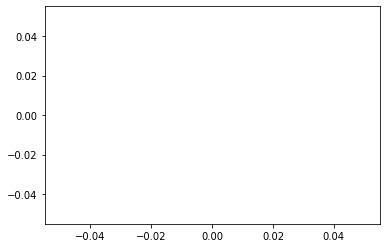

In [ ]:
returns=np.linspace(-5,1,505)

plt.plot(total, returns)

In [ ]:
np.linalg.inv(Chat)

array([[ 8.59807247e-03, -1.30546773e-03, -1.20951425e-03,
        -5.34633271e-03],
       [-1.30546773e-03,  3.99079401e-03, -6.86506267e-04,
         1.41689908e-05],
       [-1.20951425e-03, -6.86506267e-04,  6.06190518e-03,
        -2.84472025e-03],
       [-5.34633271e-03,  1.41689908e-05, -2.84472025e-03,
         9.18422896e-03]])

In [ ]:
Chat.shape

(4, 4)

In [ ]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(normalised_returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (normalised_returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(normalised_returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
import matplotlib.pyplot as plt
print('Max sharpe ratio in array:{}'.format(sharpe_arr.max()))
print('Location:{}'.format(sharpe_arr.argmax()))

Max sharpe ratio in array:8.57774687430467e-17
Location:5839


In [ ]:
print(all_weights[5839,:])
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=vol_arr[sharpe_arr.argmax()]

[0.0061925  0.00089974 0.45016998 0.54273777]


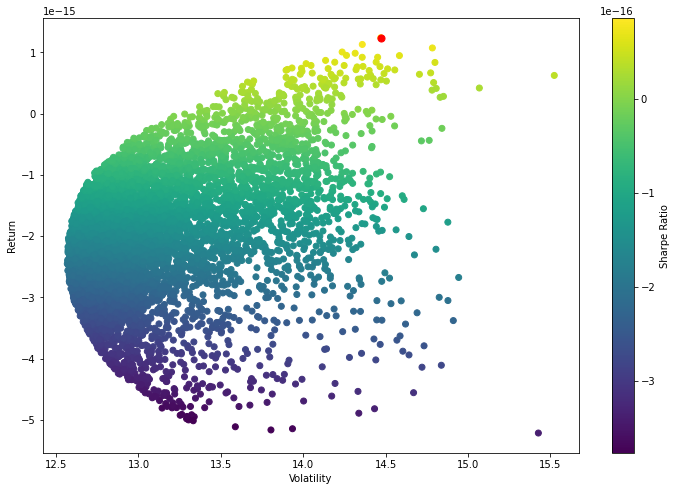

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
#returns=np.linspace(-5,1,4)

#plt.plot(total, returns)
plt.show()

In [ ]:
from scipy.optimize import minimize
def negative_sharpe_ratio(w):
    w = np.array(w)
    R = np.sum(normalised_returns.mean() * w) * 252
    vol = np.sqrt(np.dot(w.T, np.dot(normalised_returns.cov()*252, w)))
    SR= R/vol
    return -SR
def check_sum(w):
    #return 0 if sum of the weights is 1
    return np.sum(w)-1
  
w0=[0.25,0.25,0.25,0.25]
bounds=((0,1),(0,1),(0,1),(0,1))
constraints=({'type':'eq','fun':check_sum})

w_opt=minimize(negative_sharpe_ratio,w0,method='SLSQP',bounds=bounds,constraints=constraints)
w_opt

     fun: 1.5623698425667572e-16
     jac: array([ 2.29640995e-16,  2.88852545e-16, -2.05984637e-16, -3.12508902e-16])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.25, 0.25, 0.25, 0.25])

In [ ]:
returns=np.linspace(-5,1,10)
vol_opt=[]
w0=[0.2,0.2,0.2,0.2]
bounds=((0,1),(0,1),(0,1),(0,1))

def minimizeVol(w):
  w = np.array(w)
  vol = np.sqrt(np.dot(w.T, np.dot(normalised_returns.cov()*252, w)))
  return vol

def getReturn(w):
    w = np.array(w)
    R = np.sum(normalised_returns.mean() * w)*252
    return R

for R in returns:
  # find best vol
  constraints=({'type':'eq','fun':check_sum},
               {'type':'eq','fun':lambda w:getReturn(w)-R})
  opt=minimize(minimizeVol,w0,method='SLSQP',bounds=bounds,constraints=constraints)
  # save opt
  vol_opt.append(opt['fun'])

In [ ]:
vol_opt

[10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703,
 10.243597948733703]

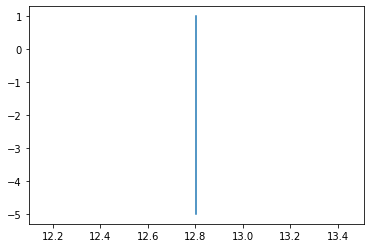

In [ ]:
plt.plot(vol_opt,returns)

# Part 5 - Final

In [ ]:
# Getting all assets from s&p500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())
# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),start='2016-11-16', 
                      end='2021-11-16')['Adj Close']
data.head()

  Symbol             Security  ...      CIK      Founded
0    MMM                   3M  ...    66740         1902
1    ABT  Abbott Laboratories  ...     1800         1888
2   ABBV               AbbVie  ...  1551152  2013 (1888)
3   ABMD              Abiomed  ...   815094         1981
4    ACN            Accenture  ...  1467373         1989

[5 rows x 9 columns]
[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-16 00:00:00,44.233482,42.953506,158.341492,25.882896,48.905487,71.977341,111.550003,36.565372,108.452797,104.080002,61.122402,37.169876,83.389664,77.570000,41.821007,49.754318,9.537058,31.910583,55.516266,77.217354,45.697090,65.900002,75.769630,94.040001,73.067734,63.449963,64.058937,28.076494,9.424292,7.67,45.821697,127.451210,101.130196,95.099648,746.489990,22.017500,92.879997,129.366821,104.483238,43.328411,...,40.832867,77.530769,46.225338,53.590900,50.001259,124.163689,60.309811,80.723427,79.690002,90.470001,46.702690,37.036674,38.371819,84.233322,140.699997,71.238388,52.956734,47.332821,50.062096,44.522633,139.502777,113.771675,61.987072,22.345108,64.049919,35.322514,42.365959,77.802505,25.166035,80.208092,33.472961,49.831306,66.034523,58.257408,51.191357,55.380486,96.865189,72.949997,33.239914,47.363918
2016-11-17 00:00:00,44.003597,44.287056,161.586426,25.873484,49.032639,73.504105,113.599998,36.968090,109.423454,105.809998,61.419556,36.946480,84.382072,78.459999,41.855518,49.644672,9.604283,32.159355,55.628872,77.190536,46.388920,66.599998,77.088982,97.239998,74.082443,64.400970,64.732040,28.740528,9.424292,8.46,46.536144,127.563744,100.766479,95.198875,756.400024,22.010000,93.529999,128.890091,105.870354,43.466831,...,41.523792,78.489258,46.810051,54.213638,50.818508,123.772980,60.474491,81.410027,80.970001,91.199997,45.924061,36.704422,38.299763,83.631798,138.850006,71.923439,52.307343,47.667606,49.243759,45.220451,140.492294,115.561676,62.041195,22.263960,62.076099,35.883289,42.485435,78.448174,25.090885,83.793716,33.464378,49.542828,65.634102,58.622898,50.871117,55.710560,96.788399,73.940002,33.639214,47.722736
2016-11-18 00:00:00,43.141541,44.702572,157.943161,25.899368,48.094898,72.632973,113.410004,36.464684,109.478905,105.019997,61.653679,37.367496,84.390999,76.900002,41.829632,49.290421,9.579072,32.208237,55.351711,76.716591,46.290092,66.440002,76.615128,94.839996,74.664955,64.616310,63.821945,28.749878,9.424292,8.71,46.005142,125.719856,100.367287,94.792969,760.159973,21.995001,93.360001,126.525017,106.373940,43.439148,...,41.992943,78.247200,44.899433,54.150459,50.279152,122.171951,60.531498,81.566956,80.040001,89.440002,46.178452,35.639252,38.483894,83.078789,135.179993,71.306885,54.202152,47.667606,49.648968,45.504753,138.582016,115.765709,62.158493,22.241829,61.492931,36.247196,42.903637,78.399239,25.992661,85.563339,33.352837,49.300880,65.672607,57.863064,50.192947,57.177589,96.634766,75.010002,33.905411,48.382183
2016-11-21 00:00:00,43.074486,44.528641,162.149933,26.292349,48.015427,71.936073,115.809998,36.391476,110.634415,105.650002,62.869267,37.504974,85.463898,75.519997,42.140244,50.032654,9.705116,31.830614,55.360374,76.671875,46.182274,66.900002,77.906601,96.180000,74.016678,64.759857,64.400230,29.320387,9.424292,8.94,45.966522,125.996895,101.343086,95.532623,780.000000,23.620001,93.769997,128.404007,107.286049,43.965183,...,42.035576,79.089516,45.541790,54.412178,51.191303,122.248337,59.923401,82.145645,80.669998,89.050003,45.746738,35.844467,38.676025,84.039291,137.649994,72.291679,54.415653,48.079632,49.140465,44.901699,140.096481,114.903183,62.726856,22.514780,62.237587,36.241230,43.065788,78.565552,26.418493,90.223694,33.75

In [ ]:
import numpy as np
#returns = np.log(data).diff()
returns = data.pct_change()
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-17 00:00:00,-0.005197,0.031046,0.020493,-0.000364,0.002600,0.021212,0.018377,0.011014,0.008950,0.016622,0.004862,-0.006010,0.011901,0.011473,0.000825,-0.002204,0.007049,0.007796,0.002028,-0.000347,0.015139,0.010622,0.017413,0.034028,0.013887,0.014988,0.010508,0.023651,0.0,0.102999,0.015592,0.000883,-0.003597,0.001043,0.013276,-0.000341,0.006998,-0.003685,0.013276,0.003195,...,0.016921,0.012363,0.012649,0.011620,0.016345,-0.003147,0.002731,0.008506,0.016062,0.008069,-0.016672,-0.008971,-0.001878,-0.007141,-0.013148,0.009616,-0.012263,0.007073,-0.016346,0.015673,0.007093,0.015733,0.000873,-0.003632,-0.030817,0.015876,0.002820,0.008299,-0.002986,0.044704,-0.000256,-0.005789,-0.006064,0.006274,-0.006256,0.005960,-0.000793,0.013571,0.012013,0.007576
2016-11-18 00:00:00,-0.019591,0.009382,-0.022547,0.001000,-0.019125,-0.011851,-0.001672,-0.013617,0.000507,-0.007466,0.003812,0.011395,0.000106,-0.019883,-0.000618,-0.007136,-0.002625,0.001520,-0.004982,-0.006140,-0.002130,-0.002402,-0.006147,-0.024681,0.007863,0.003344,-0.014059,0.000325,0.0,0.029551,-0.011411,-0.014455,-0.003962,-0.004264,0.004971,-0.000681,-0.001818,-0.018350,0.004757,-0.000637,...,0.011298,-0.003084,-0.040816,-0.001165,-0.010613,-0.012935,0.000943,0.001928,-0.011486,-0.019298,0.005539,-0.029020,0.004808,-0.006612,-0.026431,-0.008572,0.036225,0.000000,0.008229,0.006287,-0.013597,0.001766,0.001891,-0.000994,-0.009394,0.010141,0.009843,-0.000624,0.035940,0.021119,-0.003333,-0.004884,0.000587,-0.012961,-0.013331,0.026333,-0.001587,0.014471,0.007913,0.013818
2016-11-21 00:00:00,-0.001554,-0.003891,0.026635,0.015173,-0.001652,-0.009595,0.021162,-0.002008,0.010555,0.005999,0.019716,0.003679,0.012713,-0.017945,0.007426,0.015058,0.013158,-0.011724,0.000157,-0.000583,-0.002329,0.006924,0.016857,0.014129,-0.008682,0.002222,0.009061,0.019844,0.0,0.026406,-0.000839,0.002204,0.009722,0.007803,0.026100,0.073880,0.004392,0.014851,0.008575,0.012110,...,0.001015,0.010765,0.014307,0.004833,0.018142,0.000625,-0.010046,0.007095,0.007871,-0.004360,-0.009349,0.005758,0.004993,0.011561,0.018272,0.013811,0.003939,0.008644,-0.010242,-0.013253,0.010928,-0.007451,0.009144,0.012272,0.012110,-0.000165,0.003779,0.002121,0.016383,0.054467,0.012092,0.002831,0.014188,-0.004654,0.003190,-0.005773,0.014408,0.005599,0.008636,0.002205


In [ ]:
returns_interpolated= df.interpolate(method ='linear',limit_direction ='backward')
returns_interpolated.tail()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-09 00:00:00,-0.007021,0.000449,0.019657,0.002459,-0.003877,-0.010399,0.032245,-0.002918,0.001472,0.002853,0.002927,0.009875,0.007517,0.001003,0.000723,-0.000962,-0.000836,-0.008282,-0.006761,-0.005147,0.004039,0.006444,-0.014182,0.000211,-0.000849,-0.015975,0.007196,0.021770,0.009016,-0.008258,-0.000072,0.001609,-0.005636,0.004161,0.025007,0.009384,-0.000689,0.008275,0.003102,0.014304,...,-0.010216,-0.032201,0.005349,-0.009487,0.006043,0.000097,-0.008977,0.006421,0.003695,-0.005930,0.006095,-0.007493,-0.001720,-0.006178,0.000657,-0.016032,0.008426,0.009443,0.007433,-0.019265,0.011253,0.002922,-0.002937,0.001756,0.003484,-0.001228,-0.009208,0.002469,-0.004771,-0.007696,0.013707,-0.014470,0.009738,-0.003751,0.003306,-0.000238,-0.023259,-0.001826,0.002616,0.011111
2021-11-10 00:00:00,-0.003316,-0.030997,0.010241,-0.019163,0.009861,0.008101,-0.042494,0.010994,-0.007429,-0.030572,-0.022378,0.014900,0.001920,-0.026928,0.016618,0.013728,0.008790,-0.004620,0.001702,-0.004737,-0.002290,0.004299,-0.032123,-0.030112,-0.021928,-0.009376,-0.002557,-0.037686,0.002437,-0.060771,0.000430,0.007085,-0.001212,-0.014433,-0.026335,-0.017314,-0.032786,-0.012043,0.000639,-0.003430,...,0.006992,0.011948,0.004655,-0.003099,-0.017764,-0.026728,-0.008838,-0.011420,-0.008091,-0.016641,0.036539,-0.002059,0.006891,-0.001658,0.003827,-0.002648,-0.017600,0.017147,0.018972,0.009421,0.000226,-0.008698,0.015666,-0.013319,-0.009013,0.000246,0.012598,-0.011181,-0.017577,-0.022312,0.012421,-0.034683,-0.019701,-0.000717,-0.009288,-0.003091,-0.003795,-0.023367,-0.001228,-0.016529
2021-11-11 00:00:00,-0.003076,-0.011127,0.015675,-0.000338,-0.001028,0.000080,0.002869,-0.004459,0.004030,-0.006687,0.012385,0.011470,-0.004747,0.014601,-0.003791,-0.018651,0.032365,0.005534,0.000000,0.004697,0.009368,-0.004190,0.024685,-0.005365,-0.012687,0.004820,-0.001659,0.023271,0.001621,0.043898,-0.005021,-0.007739,0.004199,-0.012324,-0.002743,-0.001436,-0.018464,0.013484,0.005173,0.015681,...,0.004794,-0.023845,0.002648,0.005934,0.004684,-0.005093,0.007356,-0.003882,0.006258,-0.010856,0.002192,-0.005502,-0.002852,0.007264,-0.002817,0.019808,0.064423,-0.017652,-0.020457,0.004567,0.017593,-0.004539,-0.005183,0.026288,0.000404,-0.000492,0.013461,0.018072,-0.002169,0.025647,-0.013822,0.055031,0.001869,-0.022609,-0.014818,-0.010970,-0.008814,0.005603,0.012602,-0.004109
2021-11-12 00:00:00,0.013162,-0.048758,0.002474,0.014337,0.002915,0.000878,0.012059,0.009430,0.013708,0.022436,0.009230,-0.003175,0.010413,0.012638,0.005351,-0.007142,-0.006431,0.012072,-0.011043,-0.001247,0.018623,0.019940,0.015020,0.002755,-0.020419,0.000436,0.020920,0.018973,0.001618,0.012876,0.011101,-0.000804,0.007906,-0.001395,0.015162,0.008420,0.016632,0.014721,0.003609,0.030375,...,-0.004607,0.007936,0.012809,-0.011236,-0.008288,0.015156,0.007524,0.015400,0.012482,0.007640,-0.005650,-0.024205,-0.002097,0.001754,0.018088,0.001577,0.029582,-0.003257,0.003755,0.007314,0.031867,0.002649,0.010791,-0.008654,-0.004983,-0.000861,-0.013886,0.005589,0.003260,-0.004556,-0.005827,0.024044,-0.007619,0.008445,0.001688,0.006430,-0.002336,0.011589,-0.006222,0.005378
2021-11-15 00:00:00,-0.019269,0.001479,0.012006,0.000067,-0.001111,-0.007340,-0.034720,0.007707,-0.007489,0.003239,0.001461,0.015471,0.009224,-0.008897,0.014666,0.010485,0.012541,0.009823,-0.002061,-0.000687,-0.002112,-0.027172,-0.018488,-0.011064,0.000359,0.000785,-0.008433,-0.003507,0.000808,-0.009466,-0.001212,-0.010638,-0.002755,-0.042631,0.005824,0.004507,0.006661,-0.005995,0.000333,-0.004020,...,-0.000661,0.000990,0.007301,0.016477,0

In [ ]:
returns_interpolated.isnull().values.any()

True

In [ ]:
returns_interpolated.isna().sum().sum()

0

In [ ]:
is_NaN = returns_interpolated.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [ ]:
print(rows_with_NaN)

                   A       AAL       AAP  ...      ZBRA      ZION       ZTS
Date                                      ...                              
2016-11-17 -0.005197  0.031046  0.020493  ...  0.013571  0.012013  0.007576
2016-11-18 -0.019591  0.009382 -0.022547  ...  0.014471  0.007913  0.013818
2016-11-21 -0.001554 -0.003891  0.026635  ...  0.005599  0.008636  0.002205
2016-11-22 -0.011341  0.000000  0.020311  ...  0.022272  0.003114 -0.007400
2016-11-23  0.004274  0.005642  0.004404  ...  0.025807  0.011899  0.011082
...              ...       ...       ...  ...       ...       ...       ...
2021-11-09 -0.007021  0.000449  0.019657  ... -0.001826  0.002616  0.011111
2021-11-10 -0.003316 -0.030997  0.010241  ... -0.023367 -0.001228 -0.016529
2021-11-11 -0.003076 -0.011127  0.015675  ...  0.005603  0.012602 -0.004109
2021-11-12  0.013162 -0.048758  0.002474  ...  0.011589 -0.006222  0.005378
2021-11-15 -0.019269  0.001479  0.012006  ... -0.001825  0.013286 -0.003643

[1257 rows 

In [ ]:
nan_values = rows_with_NaN.isna()
nan_columns = nan_values.any()

columns_with_nan = rows_with_NaN.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [ ]:
returns_interpolated = returns_interpolated.drop(columns=['BF.B', 'BRK.B'])

In [ ]:
returns.isna().sum().sum()

0

In [ ]:
# Normalise data - IGNORE THIS STEP
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
normalised_returns = z_score(returns_interpolated)
normalised_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-17,-0.389807,0.856610,0.907083,-0.102291,0.099065,1.075166,0.658743,0.631554,0.504177,0.738138,0.184624,-0.419028,0.653094,0.426134,0.009593,-0.197064,0.282048,0.378031,0.071505,-0.060915,0.956750,0.517418,0.610950,1.038252,0.485224,0.915970,0.564520,0.828728,-0.020752,2.823671,0.864347,0.023318,-0.198017,0.006991,0.642618,-0.078571,0.293000,-0.236342,0.806127,0.146945,...,0.835243,0.688283,0.551999,0.400676,0.562636,-0.176677,0.114770,0.509687,0.895985,0.326588,-0.643829,-0.344866,-0.186198,-0.332618,-0.812832,0.492358,-0.426198,0.428816,-0.703871,0.698262,0.269121,0.933984,0.001821,-0.182843,-2.304472,0.907738,0.098163,0.394302,-0.152861,1.344004,-0.061500,-0.299583,-0.327343,0.303025,-0.400236,0.332537,-0.064192,0.498881,0.492444,0.397084
2016-11-18,-1.274618,0.258095,-1.053295,-0.030475,-1.131211,-0.651058,-0.112575,-0.942117,-0.037714,-0.451389,0.133262,0.686323,-0.050709,-0.903130,-0.086105,-0.556503,-0.169066,0.046358,-0.222019,-0.386097,-0.222624,-0.154075,-0.285741,-0.867752,0.271887,0.175136,-0.854730,-0.052628,-0.020752,0.750233,-0.738582,-0.943099,-0.213160,-0.319749,0.192846,-0.091088,-0.163294,-0.949791,0.248609,-0.074703,...,0.549278,-0.242414,-1.905769,-0.043752,-0.407971,-0.636710,0.037791,0.068782,-0.744298,-0.906613,0.189914,-1.159109,0.380921,-0.309172,-1.583383,-0.429461,1.187475,-0.041967,0.310319,0.270523,-0.600522,0.067075,0.080886,-0.064248,-0.740593,0.562780,0.385204,-0.122761,1.512295,0.623702,-0.278617,-0.262135,0.022425,-0.649786,-0.796179,1.638865,-0.106405,0.537475,0.312310,0.794085
2016-11-21,-0.165875,-0.108606,1.186812,0.715694,-0.141745,-0.533238,0.765872,-0.200374,0.607160,0.213553,0.911440,0.196296,0.701579,-0.821005,0.447112,1.060980,0.566945,-0.653588,-0.006865,-0.074140,-0.236199,0.326733,0.589787,0.392230,-0.314044,0.103741,0.480946,0.684880,-0.020752,0.661465,-0.111059,0.106533,0.354507,0.423139,1.337168,2.647174,0.158080,0.665457,0.498460,0.662664,...,0.026267,0.592007,0.628187,0.164758,0.627342,0.000595,-0.435325,0.415116,0.408258,-0.233497,-0.368939,0.253309,0.396602,0.496693,1.009872,0.704931,0.112999,0.533363,-0.451945,-0.619904,0.430317,-0.504931,0.644477,0.532247,0.829238,-0.057179,0.137370,0.036320,0.675684,1.642160,0.809859,0.056920,0.737781,-0.238292,0.128360,-0.419790,0.743364,0.157104,0.344084,0.055523
2016-11-22,-0.767501,-0.001113,0.898794,-0.050147,-1.444703,-0.058890,-1.639385,-2.739559,-0.177481,-0.288353,2.098136,-0.241035,0.442356,-0.234269,0.755667,-0.220748,-0.611904,-0.380634,0.038988,-0.159273,-0.356157,-0.091872,0.152482,-0.647052,1.229615,0.129878,0.017027,0.442917,-0.020752,-0.873420,-0.123574,-0.560461,-0.212225,1.146063,0.293717,0.050548,-0.008502,1.341976,0.192324,0.678570,...,-0.283369,-1.354733,2.256515,0.365753,0.370239,-0.058152,0.798236,0.107660,-0.628742,-1.479180,0.753720,-0.379130,2.045086,0.101780,-1.040449,-0.295179,-0.007212,0.647276,0.351072,0.071451,0.273044,0.423389,-0.021345,0.171976,0.734487,0.457731,0.201601,0.072132,0.637355,0.204531,-0.133088,0.111064,0.107094,-0.032564,-0.615412,0.705328,-0.688187,0.871935,0.101412,-0.555323
2016-11-23,0.192388,0.154765,0.174265,-0.351554,1.153044,0.160789,0.585887,1.403563,0.112392,-0.552059,0.416639,-0.416835,0.103915,-0.094072,-0.527880,-0.467561,-0.332748,0.292707,0.202462,0.724424,0.549882,-0.292550,-0.241428,0.308153,0.614564,-0.011243,-0.297383,0.185623,-0.020752,0.273356,-0.173548,0.273285,-0.085273,-0.741445,-0.435670,0.092804,0.002455,0.738258,0.023927,0.369939,...,0.306580,-0.327984,-0.734252,-0.528096,-0.318291,0.580716,0.055283,-0.116323,-0.142379,0.558931,-0.3

In [ ]:
# Ignore normalised, so use interpolated return
normalised_returns=returns_interpolated

In [ ]:
R = normalised_returns.to_numpy() # return matrix
N = normalised_returns.shape[1] # number of assets, number of columns
M = len(normalised_returns.index) # available return samples per asset, how many rows

In [ ]:
M

2519

In [ ]:
vol= np.diag(normalised_returns.std().to_numpy())
#vol=normalised_returns.std().to_numpy()
mean_hat=normalised_returns.mean().to_numpy()

In [ ]:
# Calculate estimated correlation
Phat = (1/M)*np.matmul(R.transpose(),R)
Phat

array([[0.99920446, 0.28944919, 0.29970457, ..., 0.51288054, 0.3639774 ,
        0.60310916],
       [0.28944919, 0.99920446, 0.27332581, ..., 0.30240135, 0.49859831,
        0.22884235],
       [0.29970457, 0.27332581, 0.99920446, ..., 0.26690052, 0.37142326,
        0.35293642],
       ...,
       [0.51288054, 0.30240135, 0.26690052, ..., 0.99920446, 0.37198009,
        0.46247907],
       [0.3639774 , 0.49859831, 0.37142326, ..., 0.37198009, 0.99920446,
        0.25707346],
       [0.60310916, 0.22884235, 0.35293642, ..., 0.46247907, 0.25707346,
        0.99920446]])

In [ ]:
# Calculate covariance
Chat = np.matmul(vol.transpose(),np.matmul(Phat,vol))
Chat

array([[0.99920446, 0.28944919, 0.29970457, ..., 0.51288054, 0.3639774 ,
        0.60310916],
       [0.28944919, 0.99920446, 0.27332581, ..., 0.30240135, 0.49859831,
        0.22884235],
       [0.29970457, 0.27332581, 0.99920446, ..., 0.26690052, 0.37142326,
        0.35293642],
       ...,
       [0.51288054, 0.30240135, 0.26690052, ..., 0.99920446, 0.37198009,
        0.46247907],
       [0.3639774 , 0.49859831, 0.37142326, ..., 0.37198009, 0.99920446,
        0.25707346],
       [0.60310916, 0.22884235, 0.35293642, ..., 0.46247907, 0.25707346,
        0.99920446]])

In [ ]:
# Checking our estimation is correct using in built cov()
normalised_returns.cov()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,USB,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.289680,0.299943,0.531048,0.441086,0.401123,0.379588,0.615799,0.609226,0.577514,0.571277,0.450801,0.529180,0.557916,0.382812,0.333719,0.386202,0.420240,0.398031,0.405262,0.533130,0.409800,0.456926,0.487574,0.341676,0.485839,0.495588,0.556696,0.333930,0.391277,0.601673,0.512778,0.562356,0.445938,0.439991,0.414197,0.622525,0.478568,0.445309,0.457525,...,0.468339,0.607604,0.423760,0.225011,0.371839,0.322140,0.278118,0.512606,0.565342,0.417928,0.276415,0.367985,0.340395,0.390041,0.657052,0.369349,0.417504,0.315631,0.294592,0.437275,0.420614,0.442631,0.493745,0.336602,0.360443,0.486434,0.448586,0.510175,0.490552,0.332763,0.358099,0.485316,0.388357,0.364231,0.556071,0.401613,0.438410,0.513289,0.364267,0.603589
AAL,0.289680,1.000000,0.273543,0.252001,0.181400,0.230966,0.175222,0.190702,0.323831,0.174731,0.328392,0.416937,0.350186,0.285727,0.108367,0.120417,0.327857,0.490310,0.533323,0.370392,0.370252,0.146316,0.352048,0.315798,0.744839,0.403966,0.397481,0.341746,0.242346,0.167541,0.397299,0.187354,0.488983,0.113211,0.159205,0.197486,0.203733,0.264394,0.310338,0.346275,...,0.504909,0.381839,0.468795,0.399607,0.441694,0.345235,0.474616,0.201428,0.192126,0.100502,0.364874,0.292174,0.139207,0.468262,0.303886,0.334812,0.399236,0.116452,0.331636,0.524199,0.403422,0.298352,0.278462,0.390851,0.048483,0.398522,0.443234,0.028746,0.464059,0.491485,0.091872,0.245240,0.453245,0.328279,0.424460,0.373856,0.408734,0.302642,0.498995,0.229025
AAP,0.299943,0.273543,1.000000,0.276329,0.265906,0.336534,0.179289,0.281002,0.385237,0.257250,0.324141,0.389403,0.401418,0.257477,0.326910,0.289722,0.314672,0.398240,0.395853,0.354472,0.394270,0.194246,0.248911,0.277751,0.394789,0.390401,0.405310,0.318397,0.289096,0.165400,0.424901,0.279541,0.442702,0.227869,0.205457,0.235373,0.295439,0.386881,0.290711,0.336648,...,0.395828,0.351498,0.389151,0.285077,0.322722,0.333306,0.365867,0.354480,0.286688,0.221760,0.335310,0.221032,0.318541,0.367594,0.297944,0.311835,0.278073,0.279607,0.329460,0.399372,0.360767,0.311514,0.351595,0.294251,0.260593,0.404412,0.372147,0.226100,0.427037,0.276918,0.322871,0.220707,0.340922,0.301183,0.392486,0.368353,0.305502,0.267113,0.371719,0.353217
AAPL,0.531048,0.252001,0.276329,1.000000,0.365340,0.341128,0.363014,0.512782,0.589909,0.652611,0.584192,0.420424,0.512218,0.558733,0.341629,0.278436,0.332468,0.364064,0.349591,0.343243,0.463679,0.426808,0.399517,0.451236,0.294606,0.445745,0.477988,0.583622,0.301400,0.466916,0.550011,0.468486,0.528610,0.418159,0.634628,0.431974,0.639430,0.415480,0.401075,0.389277,...,0.376382,0.613723,0.380578,0.285600,0.327843,0.283858,0.269694,0.528647,0.554915,0.409234,0.272853,0.295493,0.257018,0.328653,0.432926,0.323319,0.426635,0.288549,0.283571,0.367174,0.420583,0.398497,0.422331,0.340836,0.368496,0.405557,0.376807,0.412046,0.476816,0.351715,0.346503,0.506458,0.358369,0.293912,0.455650,0.398815,0.372722,0.495470,0.269318,0.538742
ABBV,0.441086,0.181400,0.265906,0.365340,1.000000,0.394422,0.241465,0.475677,0.456734,0.396195,0.343506,0.338449,0.405057,0.353899,0.261434,0.217937,0.279268,0.345948,0.342506,0.319023,0.439293,0.254676,0.220699,0.333801,0.266316,0.376156,0.360465,0.360333,0.240901,0.259316,0.437879,0.490741,0.427224,0.314396,0.299515,0.294370,0.398366,0.430679,0.342491,0.298820,...,0.353694,0.451566,0.297775,0.212379,0.351059,0.249169,0.264550,0.354801,0.351653,0.401494,0.265566,0.277579,0.334305,0.284497,0.368993,0.291171,0.262417,0.235806,0.273461,0.336760,0.319573,0.331414,0.395915,0.339236,0.258348,0.351982,0.313675,0.329653,0.339501,0.238336,0.277819,0.268326,0.345157,0.353266,0.360286,0.308411,0.371175,0.315565,0.278951,0.457164
...,...,...,...

In [ ]:
def det(a,b,c,d):
  return np.dot(a,d)-np.dot(b,c)

def optimal_allocation_vector(target_return):
  ones=np.ones(503)
  A = target_return
  B = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
  C = ones
  D = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),ones))
  E = np.dot(np.linalg.inv(Chat),mean_hat)
  F = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
  G = target_return
  H = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),ones))
  I = 1
  J = np.dot(np.linalg.inv(Chat),ones)
  K = np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
  L= np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),mean_hat))
  M= np.dot(mean_hat.transpose(),np.dot(np.linalg.inv(Chat),ones))
  N = np.dot(ones.transpose(),np.dot(np.linalg.inv(Chat),ones))

  first = det(A,B,C,D)
  second = det(F,G,H,I)
  third = det(K,L,M,N)
  total = (np.dot(first,E)+np.dot(second,J))/third
  return total

def find_risk(q):
  # using 3.3.8
  portfolio_variance = np.dot(q.transpose(),np.dot(Chat, q))
  #standard deviation (risk of portfolio)
  portfolio_risk = np.sqrt(portfolio_variance)
  return portfolio_risk

In [ ]:
returns = []
volatility = []
for i in np.linspace(0,10,100):
  returns.append(i)
  q = optimal_allocation_vector(i)
  v = find_risk(q)
  volatility.append(v)

In [ ]:
for i in range(len(returns)):
  print("V=",float("{0:.2f}".format(volatility[i])), 'R=',float("{0:.2f}".format(returns[i])),'log(R)=',float("{0:.2f}".format(np.log(returns[i]))))

V= 0.01 R= 0.0 log(R)= -inf
V= 0.66 R= 0.1 log(R)= -2.29
V= 1.32 R= 0.2 log(R)= -1.6
V= 1.98 R= 0.3 log(R)= -1.19
V= 2.65 R= 0.4 log(R)= -0.91
V= 3.31 R= 0.51 log(R)= -0.68
V= 3.97 R= 0.61 log(R)= -0.5
V= 4.64 R= 0.71 log(R)= -0.35
V= 5.3 R= 0.81 log(R)= -0.21
V= 5.96 R= 0.91 log(R)= -0.1
V= 6.63 R= 1.01 log(R)= 0.01
V= 7.29 R= 1.11 log(R)= 0.11
V= 7.95 R= 1.21 log(R)= 0.19
V= 8.62 R= 1.31 log(R)= 0.27
V= 9.28 R= 1.41 log(R)= 0.35
V= 9.95 R= 1.52 log(R)= 0.42
V= 10.61 R= 1.62 log(R)= 0.48
V= 11.27 R= 1.72 log(R)= 0.54
V= 11.94 R= 1.82 log(R)= 0.6
V= 12.6 R= 1.92 log(R)= 0.65
V= 13.26 R= 2.02 log(R)= 0.7
V= 13.93 R= 2.12 log(R)= 0.75
V= 14.59 R= 2.22 log(R)= 0.8
V= 15.25 R= 2.32 log(R)= 0.84
V= 15.92 R= 2.42 log(R)= 0.89
V= 16.58 R= 2.53 log(R)= 0.93
V= 17.24 R= 2.63 log(R)= 0.97
V= 17.91 R= 2.73 log(R)= 1.0
V= 18.57 R= 2.83 log(R)= 1.04
V= 19.23 R= 2.93 log(R)= 1.07
V= 19.9 R= 3.03 log(R)= 1.11
V= 20.56 R= 3.13 log(R)= 1.14
V= 21.23 R= 3.23 log(R)= 1.17
V= 21.89 R= 3.33 log(R)= 1.2
V= 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'log(returns)')

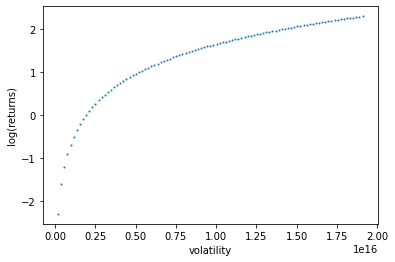

In [ ]:
import matplotlib.pyplot as plt

plt.plot(volatility,np.log(returns),'o',markersize=1)
plt.xlabel('volatility')
plt.ylabel('log(returns)')

In [ ]:
# finding return when each asset has same weight
q = np.empty(503)
q.fill(1/503)
v = find_risk(q)
r = np.matmul(q.transpose(),mean_hat)
print("v",v,'r',r)

v 0.0002885285204161005 r 0.0010237720866238538


https://www.youtube.com/watch?v=f2BCmQBCwDs
https://codingandfun.com/portfolio-risk-and-returns-python/